# Ensemble Methods Practice Notebook

Welcome to the practice notebook on ensemble methods! This notebook will guide you through the process of using ensemble techniques to predict customer churn. The dataset consists of various features related to bank customers, and your goal is to build predictive models to determine whether a customer will churn. Here is a brief explanation of the dataset's columns:

- **`customer_id`**: A unique identifier for each customer.
- **`credit_score`**: The customer's credit score.
- **`country`**: The country where the customer resides.
- **`gender`**: The customer's gender.
- **`age`**: The customer's age.
- **`tenure`**: The number of years the customer has been with the bank.
- **`balance`**: The customer's account balance.
- **`products_number`**: The number of bank products the customer uses.
- **`credit_card`**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **`active_member`**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **`estimated_salary`**: The customer's estimated annual salary.
- **`churn`**: The target variable, indicating whether the customer has churned (1 = Yes, 0 = No).

As you work through the notebook, you will load the data, preprocess it, and apply various ensemble methods such as Random Forest to predict the churn status. Remember to evaluate the performance of your models using appropriate metrics. Enjoy your practice and aim to identify the most effective ensemble technique for this problem!

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement Bagging models.
4. Evaluate the models performance.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset


In [2]:
# Load dataset
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and anomalies in the dataset. Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `churn` to understand the class balance.


In [3]:
# Summary statistics of numerical columns
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


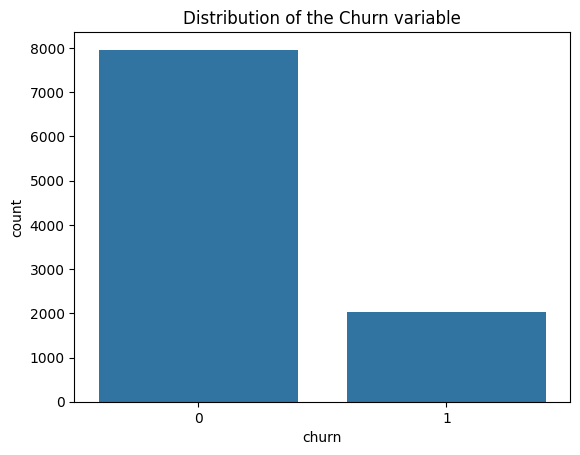

In [4]:
# Count plot for churn
sns.countplot(x='churn', data=df)
plt.title("Distribution of the Churn variable")
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding. In this dataset, the `country` and `gender` columns are categorical.

3. **Feature Scaling**: Standardize or Normalize numerical features to have a consistent scale, especially if you plan to use models sensitive to feature scaling. Consider using StandardScaler or MinMaxScaler from the `sklearn.preprocessing` module.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling. For instance, `customer_id` is a unique identifier and doesn't contribute to predicting churn.

In [6]:
# Check for missing values
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [7]:
# One-hot encoding of categorical features
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

In [ ]:
# Drop the customer_id column
df.drop(['customer_id'], axis=1, inplace=True)

In [8]:
scaler = StandardScaler()
df[['credit_score', 'age', 'balance', 'estimated_salary']] = scaler.fit_transform(df[['credit_score', 'age', 'balance', 'estimated_salary']])

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Distribution of Numerical Features**: Plot histograms to see the distribution of numerical features such as `age`, `balance`, and `estimated_salary`.

2. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as `country`, `gender`, and `products_number`.

3. **Churn Rate Analysis**: Visualize the churn rate in relation to different features to identify patterns or factors that might influence churn.

4. **Pair Plot**: Use a pair plot to visualize relationships between numerical features and see how they are distributed across different classes of the target variable.

5. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

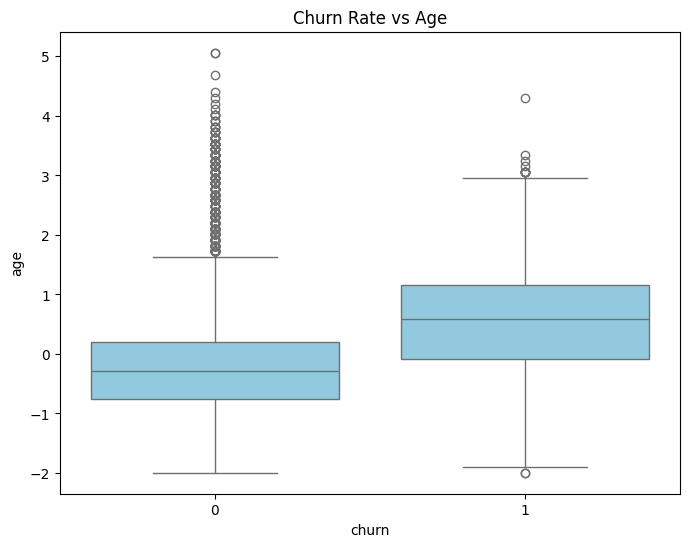

In [26]:
# Churn Rate Analysis (e.g., Churn vs. Age)
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='age', data=df , color='skyblue')
plt.title("Churn Rate vs Age")
plt.show()

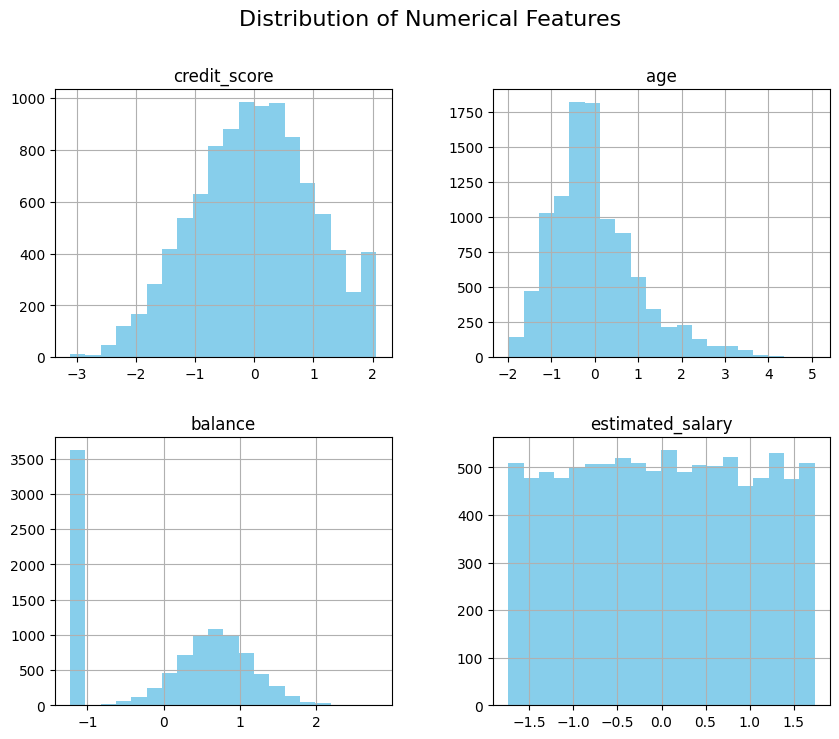

In [24]:
# Distribution of Numerical Features (histograms)
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']
df[numerical_features].hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

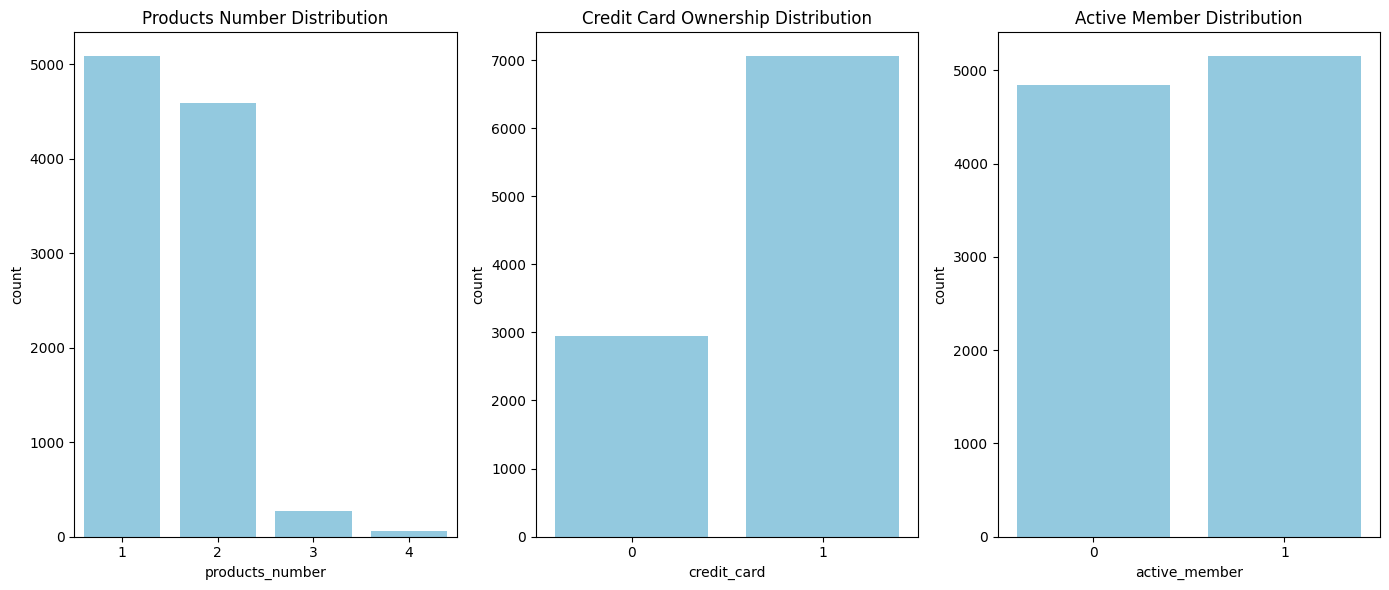

In [28]:
# Count plots for Categorical Features
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='products_number', data=df , color='skyblue')
plt.title('Products Number Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='credit_card', data=df , color='skyblue')
plt.title('Credit Card Ownership Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='active_member', data=df , color='skyblue')
plt.title('Active Member Distribution')

plt.tight_layout()
plt.show()

# Split the Dataset

Splitting the dataset into training and testing sets is essential for evaluating the performance of your models. This ensures that the models are trained and evaluated on separate data, providing an unbiased assessment of their predictive capabilities.

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data. Typically, 70-80% of the data is used for training, and 20-30% is used for testing.

In [9]:
# Define features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and Train the Classifiers

## Random Forest
Initialize and train a Random Forest classifier.

In [11]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the model performance

In [12]:
# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.8696666666666667
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.49      0.60       611

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



## XGBoost
Initialize and train an XGBoost classifier.

In [13]:
# Initialize and train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:35:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Evaluate the model performance

In [14]:
# Predictions and evaluation
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.855
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.70      0.50      0.58       611

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.85      0.85      3000



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [15]:
# Initialize Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_stack = stack_clf.predict(X_test)
print("Stacking Classifier Accuracy: ", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:36:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:37:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Classifier Accuracy:  0.8676666666666667
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.50      0.60       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



### Evaluate the model performance

In [16]:
# Confusion matrix for Random Forest
print("Confusion Matrix for Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

# Confusion matrix for XGBoost
print("Confusion Matrix for XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))

# Confusion matrix for Stacking Classifier
print("Confusion Matrix for Stacking Classifier")
print(confusion_matrix(y_test, y_pred_stack))

Confusion Matrix for Random Forest
[[2311   78]
 [ 313  298]]
Confusion Matrix for XGBoost
[[2261  128]
 [ 307  304]]
Confusion Matrix for Stacking Classifier
[[2300   89]
 [ 308  303]]


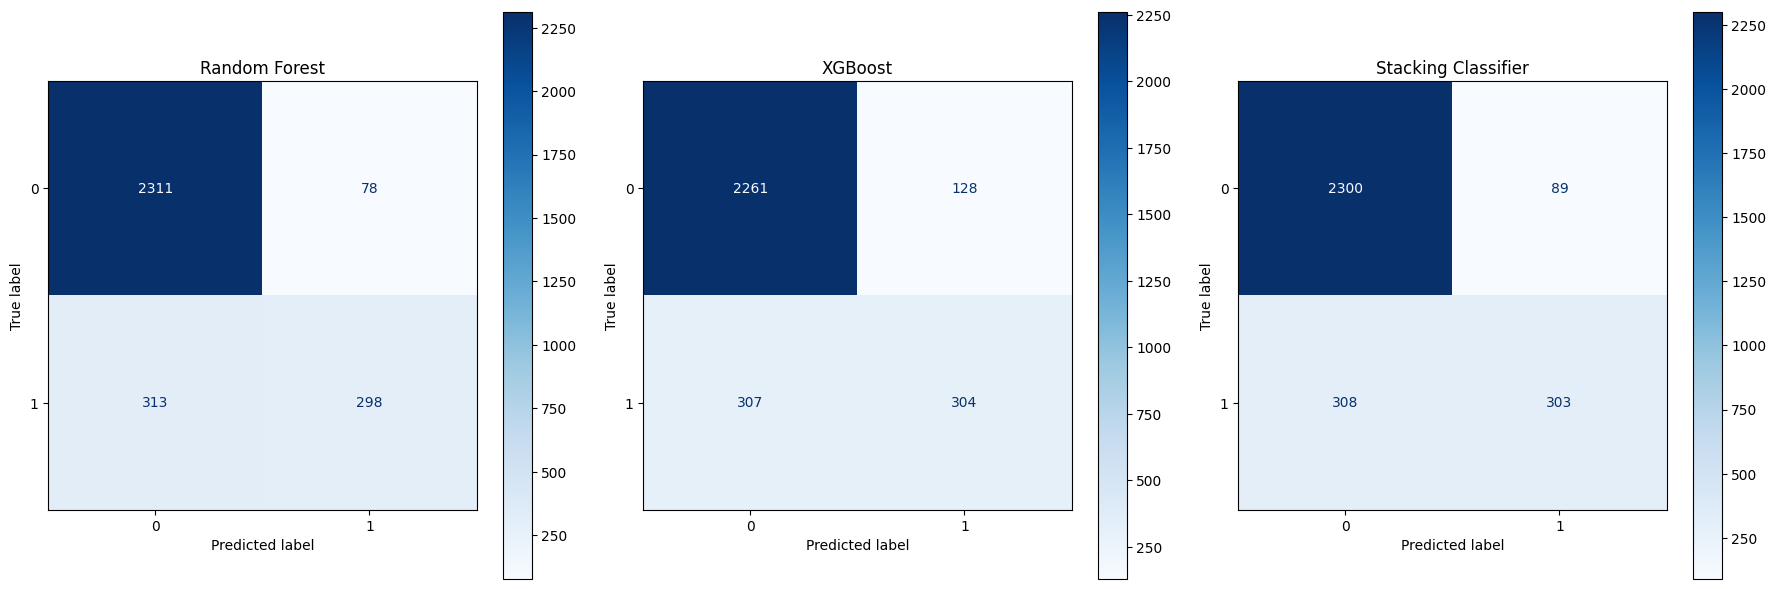

In [32]:
# Plotting the confusion matrices for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrix for Random Forest
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(ax=axs[0], cmap="Blues")
axs[0].set_title("Random Forest")

# Confusion matrix for XGBoost
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb).plot(ax=axs[1], cmap="Blues")
axs[1].set_title("XGBoost")

# Confusion matrix for Stacking Classifier
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stack).plot(ax=axs[2], cmap="Blues")
axs[2].set_title("Stacking Classifier")

plt.tight_layout()
plt.show()